Group Project- 1
Members- Aadya, Arvind, Gaurav, Radhika, Yashasvee

In [ ]:
#Loading the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("Large_Operations_Dataset.csv")
dataset.head()

,Transport_Mode,Order_Volume,Priority,Lead_Time,Machine_Uptime,Defect_Rate,Production_Time,Stock_Levels,Demand_Forecast_Accuracy,Supplier_On_Time,Supplier_Quality_Rating,Shipping_Cost,Delivery_Time,On_Time_Delivery
0,1,394,2,3,81.608343,2.629805,5.034411,323,57.844723,73.794648,3.314095,247.486263,5,0
1,0,227,2,9,91.763824,1.949442,4.980838,23,93.486251,91.404743,4.278515,241.035278,17,0
2,3,364,1,4,80.342491,2.508567,7.186772,89,83.692943,99.291128,4.093710,199.925322,18,0
3,3,374,0,1,91.155637,1.060094,6.791240,489,81.626393,67.553755,3.740387,364.121034,13,0
4,0,467,0,11,87.004033,1.815989,2.477688,146,82.583565,64.564488,4.729925,416.526355,7,0


In [ ]:
#check for missing values
print("Missing Values per Column:\n", dataset.isnull().sum())

Missing Values per Column:
 Transport_Mode              0
Order_Volume                0
Priority                    0
Lead_Time                   0
Machine_Uptime              0
Defect_Rate                 0
Production_Time             0
Stock_Levels                0
Demand_Forecast_Accuracy    0
Supplier_On_Time            0
Supplier_Quality_Rating     0
Shipping_Cost               0
Delivery_Time               0
On_Time_Delivery            0
dtype: int64


In [ ]:
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values
y

array([0, 0, 0, ..., 0, 0, 0])

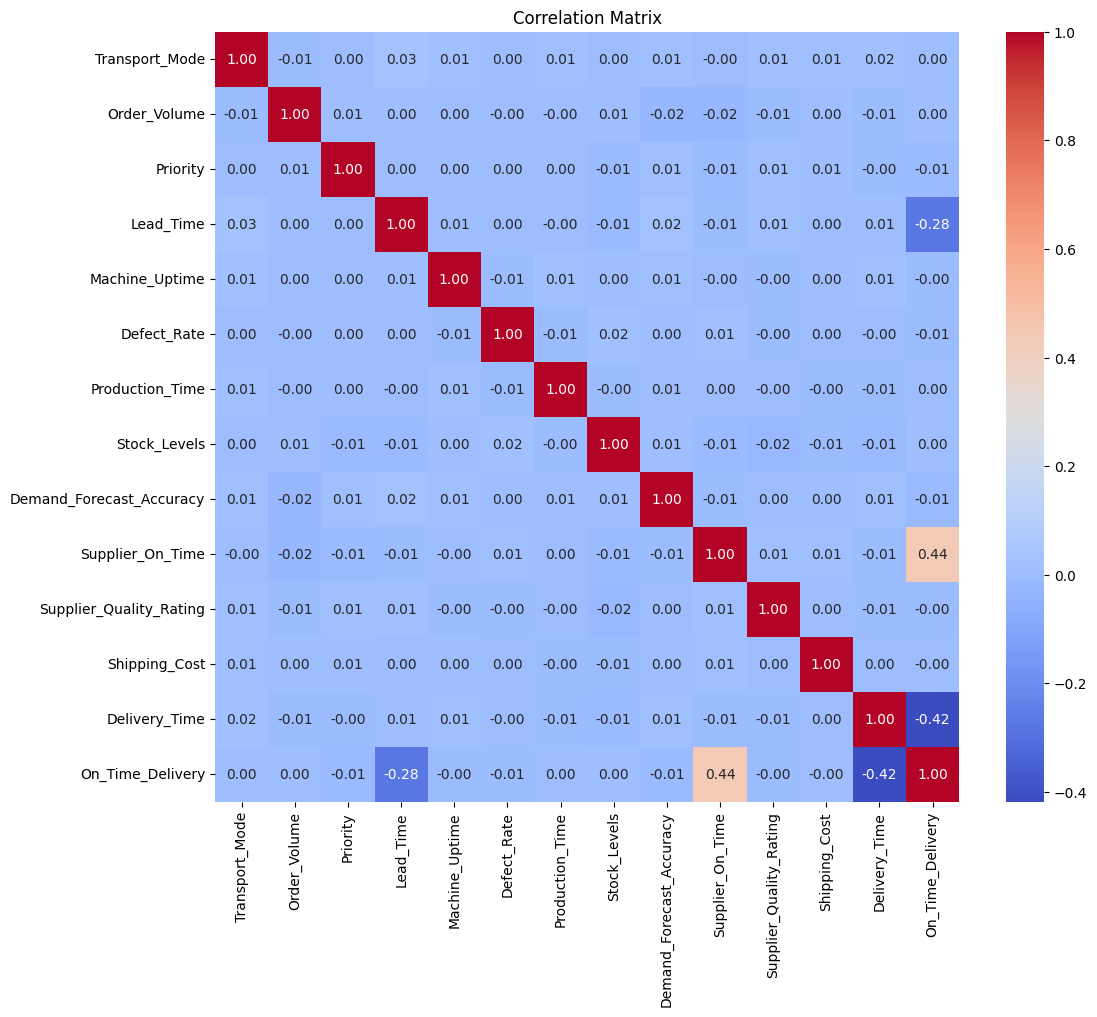

In [ ]:
#corr_matrix = dataset.corr()--for correlations between variables in the dataset.
corr_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
## Importing the relevant libraries from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
## Pass on the functionality of the library LabelEncoder to another variable
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Transport", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[  0.        ,   1.        ,   0.        , ...,   3.31409514,
        247.486263  ,   5.        ],
       [  1.        ,   0.        ,   0.        , ...,   4.2785153 ,
        241.035278  ,  17.        ],
       [  0.        ,   0.        ,   0.        , ...,   4.09371019,
        199.9253219 ,  18.        ],
       ...,
       [  0.        ,   0.        ,   1.        , ...,   1.7493376 ,
         69.36808164,  14.        ],
       [  1.        ,   0.        ,   0.        , ...,   1.84264133,
         68.12915466,   3.        ],
       [  1.        ,   0.        ,   0.        , ...,   4.4026722 ,
        182.1064746 ,  15.        ]])

In [ ]:
# Call the pandas dataframe command to convert the data into a frame which can be used further
# Note you are converting data type from Numpy array to Pandas
X = pd.DataFrame(X, columns = ["T1","T2","T3","T4","Order Volume", "Priority", "Lead Time", "Machine Uptime", "Defect Rate",
                               "Production Time","Stock Levels", "Demand Forecast Accuracy", "Supplier On time",
                               "Supplier Quality Rating", "Shipping Cost", "Delivery Time"])
X

,T1,T2,T3,T4,Order Volume,Priority,Lead Time,Machine Uptime,Defect Rate,Production Time,Stock Levels,Demand Forecast Accuracy,Supplier On time,Supplier Quality Rating,Shipping Cost,Delivery Time
0,0.0,1.0,0.0,0.0,394.0,2.0,3.0,81.608343,2.629805,5.034411,323.0,57.844723,73.794648,3.314095,247.486263,5.0
1,1.0,0.0,0.0,0.0,227.0,2.0,9.0,91.763824,1.949442,4.980838,23.0,93.486251,91.404743,4.278515,241.035278,17.0
2,0.0,0.0,0.0,1.0,364.0,1.0,4.0,80.342491,2.508567,7.186772,89.0,83.692943,99.291128,4.093710,199.925322,18.0
3,0.0,0.0,0.0,1.0,374.0,0.0,1.0,91.155637,1.060094,6.791240,489.0,81.626393,67.553755,3.740387,364.121034,13.0
4,1.0,0.0,0.0,0.0,467.0,0.0,11.0,87.004033,1.815989,2.477688,146.0,82.583565,64.564488,4.729925,416.526355,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,417.0,1.0,11.0,93.018666,4.700000,9.075624,4.0,87.997546,97.507375,3.192371,199.311565,18.0
9996,0.0,0.0,1.0,0.0,156.0,0.0,4.0,88.603296,3.853276,2.135063,471.0,71.614340,76.544693,2.284931,238.512067,9.0
9997,0.0,0.0,1.0,0.0,314.0,1.0,11.0,87.537848,2.744782,7.164046,236.0,65.399782,74.087873,1.749338,69.368082,14.0
9998,1.0,0.0,0.0,0.0,275.0,1.0,14.0,84.188795,2.435955,6.513077,332.0,64.228394,64.302053,1.842641,68.129155,3.0


In [ ]:
# FROM THE DATAFRAME DROP X1
## axis = 1 indicates where should Python look for the variable X1
## The answer is that it should look for X1 along the X-asis therefore, axis = 1 fot y-axis it should be 0
X= X.drop("T1", axis=1)
X.head()

,T2,T3,T4,Order Volume,Priority,Lead Time,Machine Uptime,Defect Rate,Production Time,Stock Levels,Demand Forecast Accuracy,Supplier On time,Supplier Quality Rating,Shipping Cost,Delivery Time
0,1.0,0.0,0.0,394.0,2.0,3.0,81.608343,2.629805,5.034411,323.0,57.844723,73.794648,3.314095,247.486263,5.0
1,0.0,0.0,0.0,227.0,2.0,9.0,91.763824,1.949442,4.980838,23.0,93.486251,91.404743,4.278515,241.035278,17.0
2,0.0,0.0,1.0,364.0,1.0,4.0,80.342491,2.508567,7.186772,89.0,83.692943,99.291128,4.093710,199.925322,18.0
3,0.0,0.0,1.0,374.0,0.0,1.0,91.155637,1.060094,6.791240,489.0,81.626393,67.553755,3.740387,364.121034,13.0
4,0.0,0.0,0.0,467.0,0.0,11.0,87.004033,1.815989,2.477688,146.0,82.583565,64.564488,4.729925,416.526355,7.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# K Means Clustering

In [ ]:
#loading libraries
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
data_x = dataset.iloc[:, 0:14] #select features for clustering

In [ ]:
#standardise the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data_z = min_max_scaler.fit_transform(data_x)
data_z

array([[0.33333333, 0.76614699, 1.        , ..., 0.48458811, 0.22222222,
        0.        ],
       [0.        , 0.39420935, 1.        , ..., 0.47141872, 0.88888889,
        0.        ],
       [1.        , 0.69933185, 0.5       , ..., 0.38749468, 0.94444444,
        0.        ],
       ...,
       [0.66666667, 0.58797327, 0.5       , ..., 0.12096819, 0.72222222,
        0.        ],
       [0.        , 0.50111359, 0.5       , ..., 0.11843897, 0.11111111,
        0.        ],
       [0.        , 0.39643653, 1.        , ..., 0.35111833, 0.77777778,
        0.        ]])

In [ ]:
cluster_range = range(2, 10) #goes till 9
cluster_errors = [] #distance between the centre of cluster and all points inside the cluster; also called variation, inertia

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, random_state = 51) #random_state is the starting point that we give
  clusters.fit(data_z)
  cluster_errors.append(clusters.inertia_)  # capture the inertia

#very static code - used by everyone

#combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,2,12012.220843
1,3,11036.666932
2,4,10426.386022
3,5,10221.150806
4,6,9924.301331
5,7,9667.765592
6,8,9488.824208
7,9,9346.661647


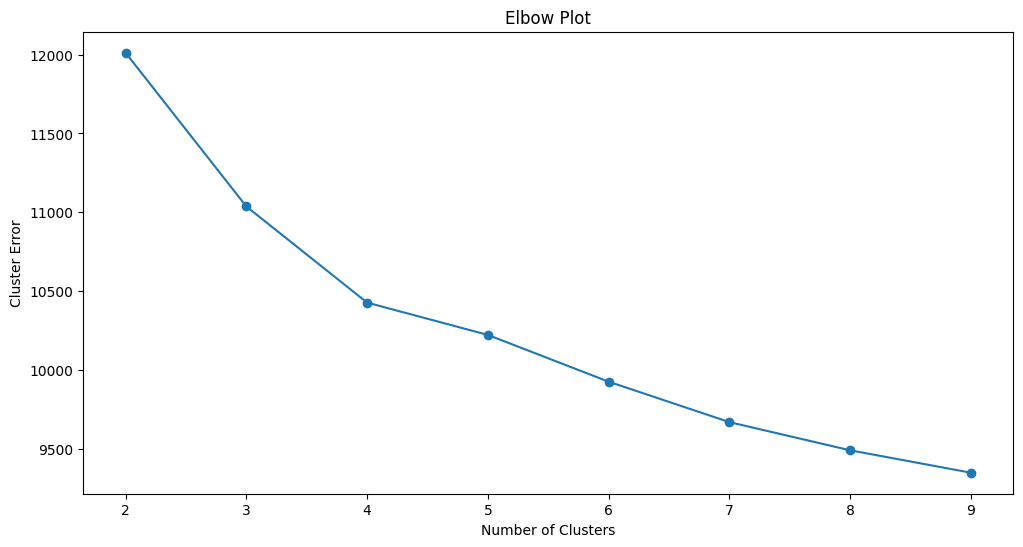

In [ ]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o");
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Error")
plt.title("Elbow Plot") #wherever the elbow bends, that is how many clusters you should be having
plt.show()

In [ ]:
#perform k-means clustering
cluster = KMeans(n_clusters=3, random_state=51)
cluster.fit(data_z)
prediction = cluster.predict(data_z)

In [ ]:
# Add Cluster Results to Data
dataset["Group"] = prediction
dataset.to_csv('results.csv', index=False)

# Display the Clusters
print(dataset[["Group", "On_Time_Delivery"]].head())

   Group  On_Time_Delivery
0      2                 0
1      2                 0
2      2                 0
3      1                 0
4      1                 0


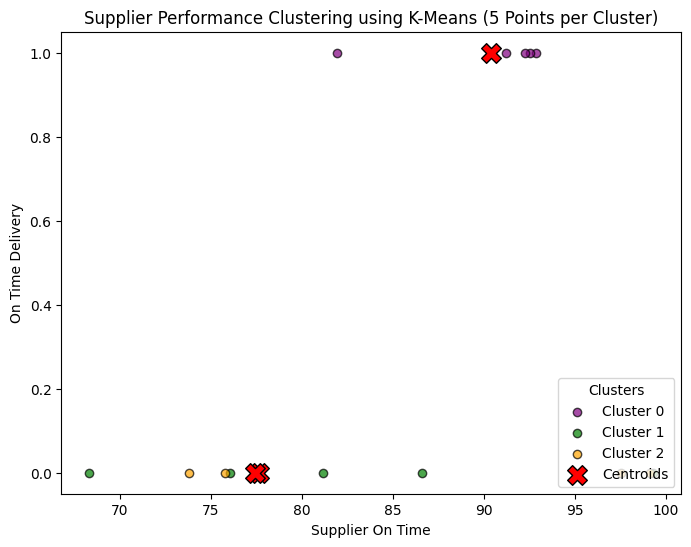

In [ ]:
#visualizing the clusters - making a scatter plot
colours = ['purple', 'green', 'orange']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

plt.figure(figsize=(8, 6))

#plot 5 random points per cluster
for i in range(3):
    cluster_data = dataset[dataset['Group'] == i].sample(n=5, random_state=42)
    #reduced the number of data points being taken for each cluster because the dataset is large
    plt.scatter(cluster_data['Supplier_On_Time'], cluster_data['On_Time_Delivery'],
                color=colours[i], label=cluster_labels[i], alpha=0.7, edgecolors='k')

# Calculate centroids - This line is added to calculate the centroids
centroids = cluster.cluster_centers_

# Accessing the centroids of the features used for clustering
centroids_original = min_max_scaler.inverse_transform(centroids) # This line is added to calculate the centroids

#plot centroids
plt.scatter(centroids_original[:, dataset.columns.get_loc('Supplier_On_Time')],
            centroids_original[:, dataset.columns.get_loc('On_Time_Delivery')],
            color='red', marker='X', s=200, label='Centroids', edgecolors='k')

plt.legend(title='Clusters', loc='lower right')
plt.xlabel('Supplier On Time')
plt.ylabel('On Time Delivery')
plt.title('Supplier Performance Clustering using K-Means (5 Points per Cluster)')
plt.show()

# K Nearest Neighbor

   Cutoff  Accuracy
0     0.1     0.838
1     0.2     0.838
2     0.3     0.838
3     0.4     0.913
4     0.5     0.913
5     0.6     0.913
6     0.7     0.866
7     0.8     0.866
8     0.9     0.866
Accuracy: 0.913
Accuracy: 0.913


<Axes: >

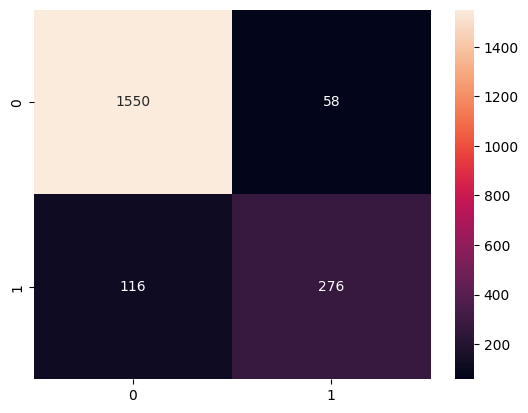

In [ ]:
# importing libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#dataset
dataset = pd.read_csv("Large_Operations_Dataset.csv")
dataset.head()

X = dataset.drop(columns=["On_Time_Delivery"])
y = dataset["On_Time_Delivery"].values

# encoding categorical variables
categorical_features = ['Priority', 'Transport_Mode']  # Specify categorical columns by name
numerical_features = X.drop(columns=categorical_features).columns

# create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # One-hot encode categorical features
    ])

# apply preprocessing to the entire dataset
X = preprocessor.fit_transform(X)


# splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training KNN model
NNH = KNeighborsClassifier(metric='euclidean', n_neighbors=3)
model_KNN = NNH.fit(X_train, y_train) # X_train and X_test are already preprocessed

#checking the cutoff value that gives the highest accuracy
accuracy = []
y_probabilities = model_KNN.predict_proba(X_test)[:, 1]  # Assuming binary classification (class 1)

from sklearn import metrics
for cutoff in np.arange(0.1, 1.0, 0.1):
    y_predicted = (y_probabilities >= cutoff).astype(int)  # Apply cutoff
    acc = metrics.accuracy_score(y_test, y_predicted)
    accuracy.append({"Cutoff": cutoff, "Accuracy": acc})

accuracy_df = pd.DataFrame(accuracy)
print(accuracy_df)

# making predictions
y_pred = model_KNN.predict(X_test)

# evaluating model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#confusion matrix
from sklearn import metrics
y_pred = model_KNN.predict(X_test)
y_pred = (y_pred > 0.40)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

#making the confusion matric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='')

# NAIVE-BAYES CODE

   Cutoff  Accuracy
0     0.1    0.8815
1     0.2    0.9170
2     0.3    0.9420
3     0.4    0.9480
4     0.5    0.9460
5     0.6    0.9230
6     0.7    0.8915
7     0.8    0.8485
8     0.9    0.8105
Accuracy: 0.946


<Axes: >

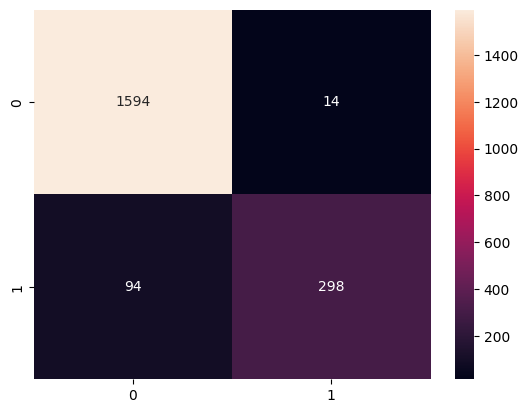

In [ ]:
## Importing the relevant libraries from sklearn
from sklearn.naive_bayes import GaussianNB

naiveClassifier = GaussianNB()
nb_classifier = naiveClassifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

#getting a table of accuracy for cutoff values to decide the best one for the model
accuracy = []
y_probabilities = nb_classifier.predict_proba(X_test)[:, 1]  # Assuming class 1 probabilities

for cutoff in np.arange(0.1, 1.0, 0.1):
    y_predicted = (y_probabilities >= cutoff).astype(int)  # Apply cutoff
    acc = metrics.accuracy_score(y_test, y_predicted)
    accuracy.append({"Cutoff": cutoff, "Accuracy": acc})

accuracy_df = pd.DataFrame(accuracy)
print(accuracy_df)

y_pred = nb_classifier.predict(X_test)
y_pred = (y_pred > 0.50) ## If the predicted probability is greater than 0.50, it assigns a label of 1, indicating the positive class. If the probability is 0.50 or less, it assigns a label of 0, indicating the negative class.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

## Codes for generating confusion Mmatrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='')

# CLASSIFICATION AND REGRESSION TREE [CART]

In [ ]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)  # Max depth is 4 because at this depth, 5-6/8 nodes are highly efficient. Going below would overfit the data.

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

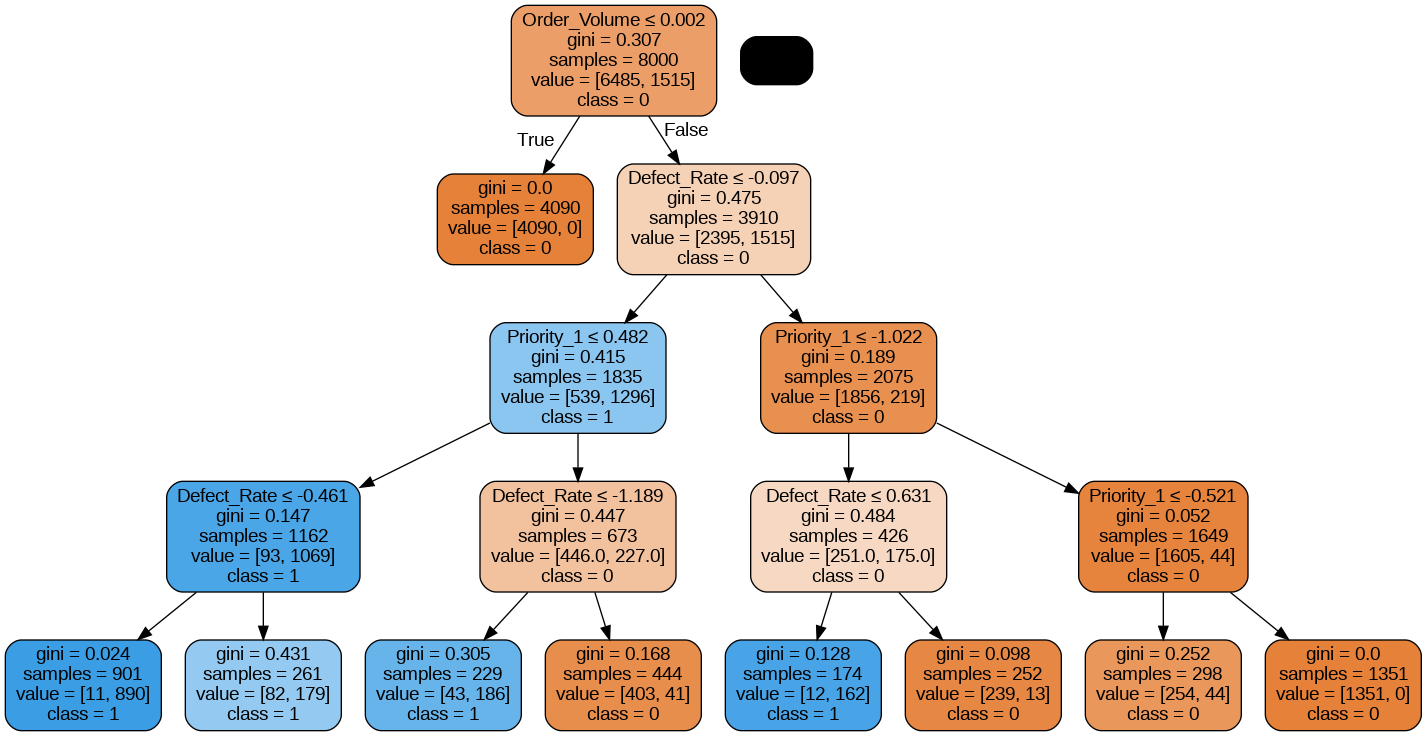

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
## feature_cols = ["T2","T3","T4","Order_Volume", "Priority", "Lead_Time", "Machine_Uptime", "Defect_Rate", "Production_Time","Stock_levels", "Demand_Forecast_Accuracy", "Supplier_On_Time","Supplier_Quality_Rating", "Shipping_Cost", "Delivery_Time"]

feature_cols = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)) + list(numerical_features)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

Accuracy: 0.9775


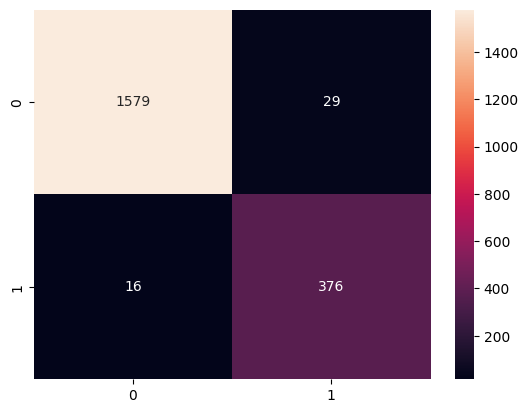

In [ ]:
import seaborn as sns
from sklearn import metrics
# Predicting the Test set results
# Determine if the value is less than or more than the cut-off value
y_pred = clf.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] > 0.5: #means that only when the predicted value of y>0.5, the On_Time_Delivery variable is assigned a value of 1 (meaning yes).
        y_pred[i] = 1
    else:
        y_pred[i] = 0
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot =True,fmt='');